In [10]:
import os
import sys
import urllib.request
import json
import re
import konlpy
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import konlpy
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
import konlpy.tag

def get_blog():
    keyword = input('검색어를 입력하세요:')
    client_id = "OKQPTGKiQf0V3yitzK6o"
    client_secret = "uIGSvzveCB"

    encText = urllib.parse.quote(keyword)

    tlist = []
    llist = []
    dlist = []



    for pagenum in range(1,1000,100):

        try:

            url = "https://openapi.naver.com/v1/search/blog?query=" + encText +"&display=100&sort=sim&start="+str(pagenum)# json 결과   블로그 1~100  101~200
            # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
            request = urllib.request.Request(url)
            request.add_header("X-Naver-Client-Id",client_id)
            request.add_header("X-Naver-Client-Secret",client_secret)
            response = urllib.request.urlopen(request)
            rescode = response.getcode()
            if(rescode==200):
                response_body = response.read()
                print(response_body.decode('utf-8'))
                jtemp = response_body.decode('utf-8')
                jdata = json.loads(jtemp)
                jdata['items']
                
                for temp in jdata['items']:  
                    hangul = re.compile('[^ ㄱ-ㅎ|가-힣]+')
                    tdata = temp['title']
                    ldata = temp['link']
                    ddata = hangul.sub(r'',temp['description'])

                    tlist.append(tdata)
                    llist.append(ldata)
                    dlist.append(ddata)
                

            else:
                print("Error Code:" + rescode)

        except:
            print('Error')



    result = []
    for temp in range(len(tlist)):
        temp1 = []
        temp1.append(tlist[temp])
        temp1.append(llist[temp])
        temp1.append(dlist[temp])

        result.append(temp1)


    f = open('{0} - 네이버API 블로그검색.csv'.format(keyword) , 'w', encoding='utf-8')
    f.write('제목'+',' + '링크' + ',' + '내용' + '\n')
    for temp in result:    
        f.write(temp[0] + ',' + temp[1] + ',' + temp[2] +'\n')
    f.close()
    
    #여기서 결과를 리턴해줘야 쓸수있음
    return result

In [11]:


def clean_str(s):
    hangul = re.compile('[^ㄱ-ㅎ|가-힣]+')
    s = hangul.sub(r' ',s)
    
    cp = re.compile("["
                     u"\U00010000-\U0010FFFF"
                     "]+", flags=re.UNICODE)
    s = cp.sub(r' ',s)
    
    return s.strip()


def get_text(data):
    result_text = ''
    for temp in data:
        result_text = result_text +' ' +  temp[2]

    return result_text


def Wordcloud(data , savename , maskname=''):
    noun_text = ''
    for word in data:
        noun_text = noun_text +' ' + word
    
    if maskname == '':
        wc = WordCloud( font_path='../data/WordCloud/font/BMEULJIROTTF.ttf' , background_color='white', max_font_size=60, colormap='PuOr_r').generate(noun_text)
    else:
        maskimg = np.array(Image.open(maskname))
        wc = WordCloud(font_path='../data/WordCloud/font/BMEULJIROTTF.ttf' , background_color='white', mask=maskimg, max_font_size=60, colormap='PuOr_r').generate(noun_text)
        
#     wc.generate_from_frequencies(data)
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    wc.to_file('../data/크롤링/savename' + '.png')


In [9]:
bdata = get_blog()# 여기를 블로그 대신 뉴스나 카페로 고치면 뉴스나 카페로 크롤링 가능
rtext = get_text(bdata)

검색어를 입력하세요:노인보호구역
{
"lastBuildDate": "Thu, 30 Sep 2021 13:55:42 +0900",
"total": 44045,
"start": 1,
"display": 100,
"items": [
{
"title": "<b>노인보호구역</b> ‘실버존’ 제대로 알고 지켜주세요!",
"link": "https:\/\/blog.naver.com\/safeppy?Redirect=Log&logNo=222008845357",
"description": "어린이 보호구역처럼 노인들 역시 많은 보호와 관심이 필요합니다. 복지관을 이용하며 <b>노인보호구역</b>을 매일 지난다는 81세 김 할머니는 “내 앞을 씽 지나가는 차량 때문에 놀라 넘어질 뻔한 적이 있다. 우리는... ",
"bloggername": "대한민국 119_소방청 공식 블로그",
"bloggerlink": "https://blog.naver.com/safeppy",
"postdate": "20200622"

},
{
"title": "어린이,장애인,<b>노인 보호구역</b> 벌점 범칙금 과태료",
"link": "https:\/\/blog.naver.com\/lky94312?Redirect=Log&logNo=222076100907",
"description": "도로에서 운전을 하다 보면 어린이보호구역, <b>노인보호구역</b>, 장애인보호구역이라는 표시를 보게 된다.... 교통약자 보호구역 및 관련시설 교통약자보호구역은 어린이, 노인, 장애인 등과 같이 신체적으로... ",
"bloggername": "알뜰한 잡학",
"bloggerlink": "https://blog.naver.com/lky94312",
"postdate": "20200831"

},
{
"title": "<b>노인보호구역</b>, 실버존(Silver Zone)",
"link": "https:\/\/blog.naver.com\/12sunrise703?Redirect=Log&logNo=222324946366

{
"lastBuildDate": "Thu, 30 Sep 2021 13:55:42 +0900",
"total": 44045,
"start": 101,
"display": 100,
"items": [
{
"title": "지정하면 뭐하나…'있으나마나' <b>노인보호구역</b>[MBC뉴스데스크]",
"link": "https:\/\/blog.naver.com\/impear?Redirect=Log&logNo=222236028094",
"description": "앵커 어린이 보호 구역 처럼 어르신들 많이 오가는 지역에 '<b>노인 보호 구역</b>'이 있습니다. 얼마 전... &quot; <b>노인보호구역</b> 지정은 늘고 있지만 정작 노인들은 보호받지 못한 채 불안한 보행을 하고 있습니다. MBC뉴스... ",
"bloggername": "곰바이보험하늘",
"bloggerlink": "https://blog.naver.com/impear",
"postdate": "20210208"

},
{
"title": "스쿨존·횡단보도 등 <b>보호구역</b>에서 교통법규 위반 시... ",
"link": "https:\/\/blog.naver.com\/sexysbkang?Redirect=Log&logNo=222449289071",
"description": "② <b>노인 보호구역</b> 및 장애인 보호구역에서의 속도 위반에 대해서도 어린이 보호구역과 같은 규정이 적용됩니다. ①, ② 규정은 2021년 9월 개시되는 자동차 보험부터 적용될 예정입니다. ③ 보행자가... ",
"bloggername": "직장생활백서",
"bloggerlink": "https://blog.naver.com/sexysbkang",
"postdate": "20210729"

},
{
"title": "<b>노인 보호구역</b>에 대해 들어보셨나요?",
"link": "https:\/\/blog.naver.com\/ems8949?Redirect=Log&logNo=221979502901",
"de

{
"lastBuildDate": "Thu, 30 Sep 2021 13:55:42 +0900",
"total": 44045,
"start": 201,
"display": 100,
"items": [
{
"title": "울산에 <b>노인보호구역</b> 100곳 추가 지정합니다.",
"link": "https://blog.ulsan.go.kr/8968",
"description": "어린이보호구역은 많이 보셨죠? 생소한 단이지만 <b>노인보호구역</b>도 있다는 사실. <b>노인보호구역</b>은 노인들의 왕래가 잦고 교통량이 많은 곳의 노인 보행권을 확보하기 위한 곳입니다. 어린이보호구역처럼 일정... ",
"bloggername": "울산광역시 대표 블로그 울산누리",
"bloggerlink": "https://blog.ulsan.go.kr/",
"postdate": "20190327"

},
{
"title": "교통약자를 위한 어린이보호구역, <b>노인보호구역</b>... ",
"link": "https:\/\/blog.naver.com\/2guysdetailteam11?Redirect=Log&logNo=222062165407",
"description": "보행자를 보호하기 위해 운전자 처벌을 강화한 민식이법이 시행되었는데요. 이처럼 어린이, 노인... 어린이보호구역, <b>노인보호구역</b>, 장애인보호구역은 법규 위반 시 범칙금과 벌점을 기본보다 두 배로... ",
"bloggername": "팀일레븐 & 투가이즈디테일의 메인터넌스 Story",
"bloggerlink": "https://blog.naver.com/2guysdetailteam11",
"postdate": "20200816"

},
{
"title": "제천시, <b>노인보호구역</b>(실버존) 확대-추가4개소 지정 고시... ",
"link": "https:\/\/blog.naver.com\/aeran0704?Redirect=Log&logNo=222304643039",
"descrip

{
"lastBuildDate": "Thu, 30 Sep 2021 13:55:43 +0900",
"total": 44045,
"start": 301,
"display": 100,
"items": [
{
"title": "아산경찰서, <b>노인보호구역</b> 30개소에 교통안전 현수막 게첨",
"link": "https:\/\/blog.naver.com\/satleceo?Redirect=Log&logNo=220929615881",
"description": "아산경찰서(서장 김종민)는 아산시청과 협업해 최근 다발하고 있는 교통사고(사망)근절을 위해 온천동 노인종합복지관 등 <b>노인보호구역</b> 30개소에 교통안전 현수막을 걸었다고 7일 밝혔다.... ",
"bloggername": "아산사랑 소식",
"bloggerlink": "https://blog.naver.com/satleceo",
"postdate": "20170207"

},
{
"title": "<b>노인보호구역</b> 표지판 공사",
"link": "https:\/\/blog.naver.com\/sean1705?Redirect=Log&logNo=222126066748",
"description": "<b>노인보호구역</b> 신설지정 시점표지 설치 led표지판 신설 고소용으로 스카이작업",
"bloggername": "도로의 마술사",
"bloggerlink": "https://blog.naver.com/sean1705",
"postdate": "20201025"

},
{
"title": "운전자라면 꼭 알아야 할 <b>노인보호구역</b> !!",
"link": "https://blog.daum.net/insufirst/7300024",
"description": "<b>노인보호구역</b>은 교통약자인 노인을 교통사고 위험에서 보호하기 위해 양로원, 경로당, 노인병원... 등 노인들의 통행량이 많은 구역을 선정해 노인들의 안전한 통행을 보장하고자 교통안전구역으로... ",
"bloggername

{
"lastBuildDate": "Thu, 30 Sep 2021 13:55:43 +0900",
"total": 44045,
"start": 501,
"display": 100,
"items": [
{
"title": "어린이ㆍ<b>노인</b>ㆍ장애인 <b>보호구역</b> 통합지침",
"link": "https:\/\/blog.naver.com\/ggarismakang?Redirect=Log&logNo=20186325731",
"description": "2004년 경찰청 어린이<b>보호구역</b> 개선사업 업무편람 업무편람2004.zip 2011년 행정안전부 어린이ㆍ<b>노인</b>ㆍ장애인 <b>보호구역</b> 통합 지침 어린이·<b>노인</b>·장애인<b>보호구역</b>_통합지침2011.pdf 2006년 충북지부... ",
"bloggername": "Walking Around",
"bloggerlink": "https://blog.naver.com/ggarismakang",
"postdate": "20130423"

},
{
"title": "(MMA2액형) 인천 도화동외 1개소 <b>노인보호구역</b>",
"link": "https:\/\/blog.naver.com\/7040hyun?Redirect=Log&logNo=220439636965",
"description": "장소 : 인천 남부 도화동 &quot;도곡양로원&quot;주변 도로 외 1개소 색상 : 적갈색 자재 : MMA2액형 타입 : 롤러 문의 : 공사에 대한 질문의 언제라도... E-MAIL : ********@*****.*** h.p ***-****-**** 왕복2차선도로... 정말... ",
"bloggername": "보인다고 해서 그것들이 진정 진실일까?",
"bloggerlink": "https://blog.naver.com/7040hyun",
"postdate": "20150803"

},
{
"title": "#어린이보호구역 <b>노인보호구역</b> 조심운전",
"link": "

{
"lastBuildDate": "Thu, 30 Sep 2021 13:55:43 +0900",
"total": 44045,
"start": 601,
"display": 100,
"items": [
{
"title": "어린이<b>보호구역</b> 미끄럼방지 스템프시공",
"link": "https:\/\/blog.naver.com\/art-road?Redirect=Log&logNo=221974475565",
"description": "보행자보호구역! <b>노인보호구역</b>! 모두 아트로드의 단골테마 입니다! 스템프로 시공하면 배수처리가 좋고 미끄럼방지의 내구성이 아주 탄탄하기 때문에 아스팔트의 수명이 더 오래간다는 사실!!! 도로미끄럼방지... ",
"bloggername": "아트로드 : 도막형바닥재 공사 전문 조달청등록업체",
"bloggerlink": "https://blog.naver.com/art-road",
"postdate": "20200522"

},
{
"title": "장애인<b>보호구역</b>내 범칙금과 벌금 총정리",
"link": "https:\/\/blog.naver.com\/debc2019?Redirect=Log&logNo=221595182544",
"description": "교통약자보호구역인 어린이보호구역, <b>노인보호구역</b>, 장애인보호구역에서는 법규 위반 시 과태료, 범칙금, 벌점을 기존의 2배로 부과합니다! 휴일과 공휴일 관계없이 오전 8시부터 오후 8시까지 매일... ",
"bloggername": "장애인기업종합지원센터",
"bloggerlink": "https://blog.naver.com/debc2019",
"postdate": "20190725"

},
{
"title": "9월부터 어린이<b>보호구역</b>에서 과속하면? 스쿨존과속",
"link": "https:\/\/blog.naver.com\/hinesisy?Redirect=Log&logNo=222448369143",
"description": "그리

{
"lastBuildDate": "Thu, 30 Sep 2021 13:55:44 +0900",
"total": 44045,
"start": 701,
"display": 100,
"items": [
{
"title": "[일반표지판] <b>노인보호구역</b>해제 표지판",
"link": "https:\/\/blog.naver.com\/ceci0701?Redirect=Log&logNo=221963618146",
"description": "표지판 사이즈 700 X 1190 글씨체 : 산돌고딕 고휘도 반사지 : 백색/빨강/파랑/노랑 검정색 시트지 : 띠/숫자/글씨/해제창 국토교통부",
"bloggername": "하루",
"bloggerlink": "https://blog.naver.com/ceci0701",
"postdate": "20200515"

},
{
"title": "초등학교 안심골목 어린이<b>보호구역</b>-미끄럼방지도로",
"link": "https:\/\/blog.naver.com\/art-road?Redirect=Log&logNo=221828671787",
"description": "어린이보호구역 , <b>노인보호구역</b>, 학교입구 , 초등학교입구, 오르막길,내리막길 모두 아트로드가 책임질께요 여러분 오늘도 아트로드 하세요^^ 누군가와 함께 하고 싶은 거리, 아트로드가 함께합니다 문의 055)551... ",
"bloggername": "아트로드 : 도막형바닥재 공사 전문 조달청등록업체",
"bloggerlink": "https://blog.naver.com/art-road",
"postdate": "20200305"

},
{
"title": "공주시, 어린이<b>보호구역</b>에 특수색 교통신호등",
"link": "https:\/\/blog.naver.com\/jblegok?Redirect=Log&logNo=110186075858",
"description": "이는 2011년 11월 경찰청 LED 교통신호등 표준 지침이 개정되면서 

{
"lastBuildDate": "Thu, 30 Sep 2021 13:55:44 +0900",
"total": 44045,
"start": 901,
"display": 100,
"items": [
{
"title": "어린이<b>보호구역</b> 주·정차 위반 과태료 상향 안내",
"link": "https:\/\/blog.naver.com\/sunsun5872?Redirect=Log&logNo=222278021652",
"description": "기준 8만원, 승합차 기준 9만원) =&gt; (개정) 일반도로의 3배 (승용차 기준 12만원, 승합차 기준 13만원) ※ <b>노인</b>·장애인 <b>보호구역</b>은 현행대로 일반도로의 2배 유지 * 문 의 : 성북구청 교통지도과(02-2241-3510)",
"bloggername": "happy의 부동산 정보",
"bloggerlink": "https://blog.naver.com/sunsun5872",
"postdate": "20210317"

},
{
"title": "국토부, '시속 30km' 어린이·노약자 <b>보호구역</b> 확대한다",
"link": "https:\/\/blog.naver.com\/mgraph?Redirect=Log&logNo=220676225094",
"description": "또, 보행교통사고 감소를 위해 생활도로구역, 어린이·<b>노인 보호구역</b>을 확대하고 생활도로구역 통행속도를 시속 30km로 제한할 계획이다. 여기에 어린이 통학차량 안전캠페인 및 불법행위 집중단속을... ",
"bloggername": "모터그래프",
"bloggerlink": "https://blog.naver.com/mgraph",
"postdate": "20160406"

},
{
"title": "[효원<b>노인</b>복지센터] 청주<b>노인</b>주간<b>보호</b>센터 / 코로나19 백신... ",
"link": "https:\/\/blog.naver.com\/envy6680?Redire

In [5]:
#부정어사전 추가
n = pd.read_csv('../data/크롤링/사전/neg_pol_word.csv',sep='\n')
nag = []
for i in n['0']:
    nag.append(i)

In [6]:
#부정어사전 추가
p = pd.read_csv('../data/크롤링/사전/neg_pol_word.csv',sep='\n')
pos = []
for i in p['0']:
    pos.append(i)

#불용리스트 만들기
stopwords = ['실버존','스쿨존','보호','구역','노인','어린이','등','교통','곳','지정','안전','사업','일','시설','위해','및','년','장애인','위','경로당','설치','주변',
            '교통사고','보행자','보행','환경','도로','시','유치원','이번','중','조례','복지','차량','올해','애인','개','개소','억','관내',
            '의원','전국','발생','추가','이','물','월','원','확대','내','현재','광주','리','지역','최근','대전','것','지난해','초등학교','관','인구',
            '존','완료','대한','투입','공단','기자','대해','지난','마을','로','수','총','시행','조성','추진','공원','경찰정','경찰','충남',
            '회','또','군','신규','계획','안','광주시','시스템','생활','활동','중구','어르신','윤','실버','서울시회관','경우','통행','기준','어린이집',
            '진행','구','경기도','만','윤','복지관','아산시','대책','기관','인근','행사','점검','부과','지원','대폭','도시','억원','횡단보도','전통','도',
            '서울시','시장','회관','운영','가운데','민주당','공사','제조','요양원','개정','이상','규칙','고','지자체','앞','억만원','운전','출처',
            '학교','일자리','만원','도로교통법','미끄럼','주간','주민','금','일반','표시','센터']

#불용어사전 추가
for i in stopwords:
    pos.append(i)

In [7]:
#분리
def get_tags(text, ntags=50):
    spliter = Okt()
    nouns = spliter.nouns(text)
    count = Counter(nouns)
    words = dict(count.most_common(ntags))
    
    #불용어 사전안에 있으면 삭제
    for i in pos:
        if i in words:
            del words[i]
    return words

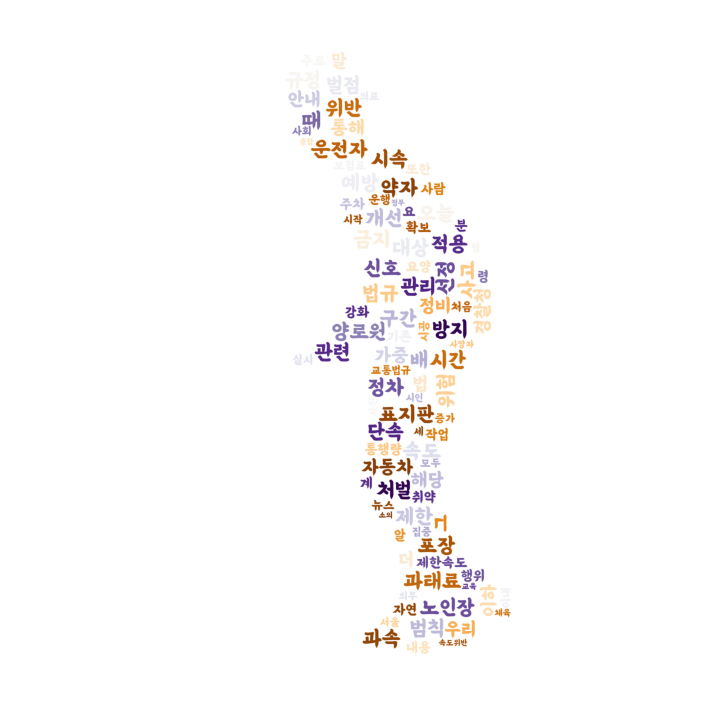

In [8]:
rtags = get_tags(rtext, ntags=200)
# print(rtags)

Wordcloud(rtags, '노인보호구역','../data/WordCloud/mask/mask1.jpeg')
